In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
f = pd.read_csv('/Users/danherman/Desktop/oud_treatment_outcome/data/clean_data/merged.csv')

In [4]:
"""
remove 'WK' from values in VISIT column
"""
f.VISIT = f.VISIT.str.replace('WK', '').astype(int)

<Axes: title={'center': 'Positive Opiate Tests'}, xlabel='Week in Treatment', ylabel='Number of Positive Tests'>

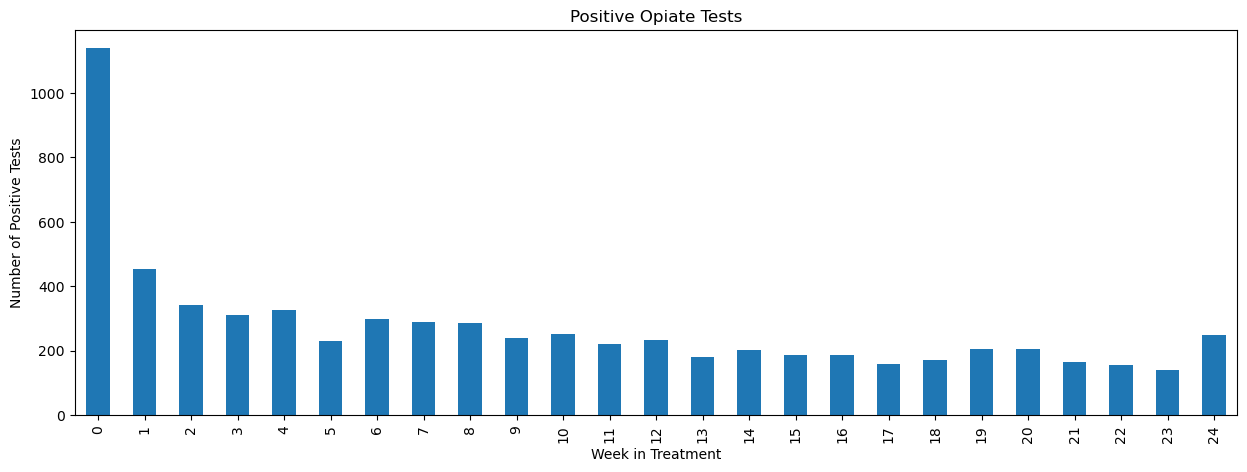

In [5]:
f.groupby('VISIT').agg({'t_Opiate300':'sum'}).plot(kind='bar', 
                                                   figsize=(15,5), 
                                                   legend=False,
                                                   title='Positive Opiate Tests', 
                                                   xlabel='Week in Treatment', 
                                                   ylabel='Number of Positive Tests')

In [6]:
f.columns

Index(['patdeid', 'VISIT', 'medication', 'total_dose', 'admin_location',
       'sru_alcohol', 'alc_qty', 'sru_cannabis', 'sru_cocaine',
       'sru_amphetamine', 'sru_methamphetamine', 'sru_opiates',
       'sru_benzodiazepines', 'sru_propoxyphene', 'sru_methadone',
       'sru_oxycodone', 'sru_other', 't_alcohol', 'alc_result', 'urine_test',
       'refuse_reason', 'other_reason', 'urine_temp', 'supervised',
       't_Amphetamines', 't_Benzodiazapines', 't_Methadone', 't_Oxycodone',
       't_Cocaine', 't_Methamphetamine', 't_Opiate300', 't_Cannabinoids',
       't_Propoxyphene'],
      dtype='object')

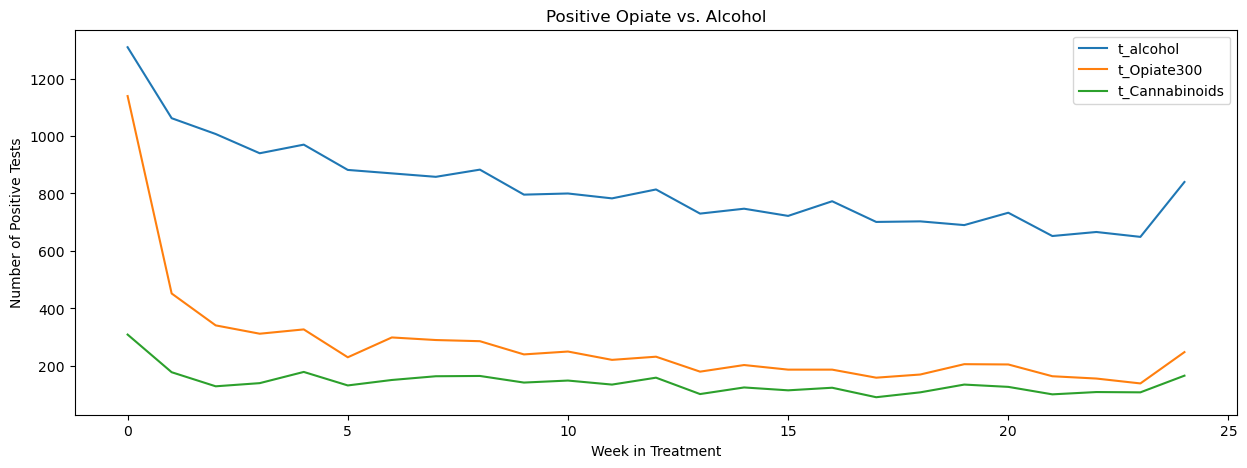

In [7]:
f.groupby('VISIT').agg({'t_alcohol':'sum',
                        't_Opiate300':'sum',
                        't_Cannabinoids':'sum'}).plot(kind='line', 
                                                   figsize=(15,5), 
                                                   legend=True,
                                                   title='Positive Opiate vs. Alcohol', 
                                                   xlabel='Week in Treatment', 
                                                   ylabel='Number of Positive Tests');

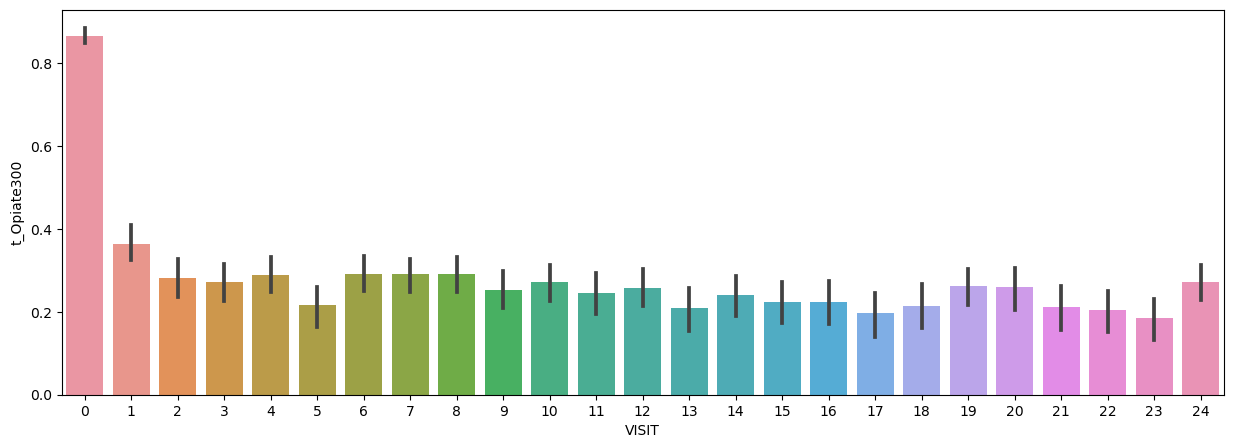

In [8]:
plt.figure(figsize=(15,5))
sns.barplot(data=f, x='VISIT', y='t_Opiate300');

In [24]:
f.patdeid.sample(1)

22757    1875
Name: patdeid, dtype: int64

In [26]:
f.columns

Index(['patdeid', 'VISIT', 'medication', 'total_dose', 'admin_location',
       'sru_alcohol', 'alc_qty', 'sru_cannabis', 'sru_cocaine',
       'sru_amphetamine', 'sru_methamphetamine', 'sru_opiates',
       'sru_benzodiazepines', 'sru_propoxyphene', 'sru_methadone',
       'sru_oxycodone', 'sru_other', 't_alcohol', 'alc_result', 'urine_test',
       'refuse_reason', 'other_reason', 'urine_temp', 'supervised',
       't_Amphetamines', 't_Benzodiazapines', 't_Methadone', 't_Oxycodone',
       't_Cocaine', 't_Methamphetamine', 't_Opiate300', 't_Cannabinoids',
       't_Propoxyphene'],
      dtype='object')

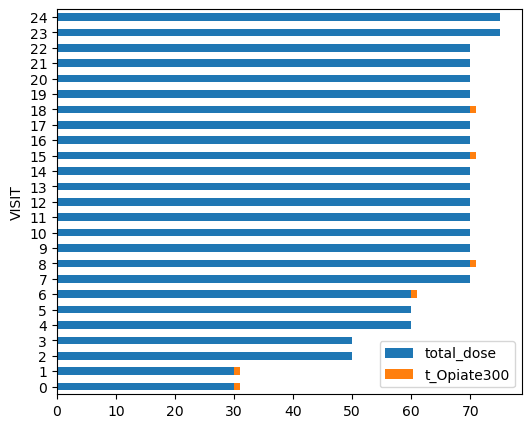

In [36]:
f.loc[f.patdeid==1875].groupby('VISIT').agg({'total_dose':'sum',
                                          't_Opiate300':'sum'}).plot(
                                            kind='barh', stacked=True, figsize=(6,5));

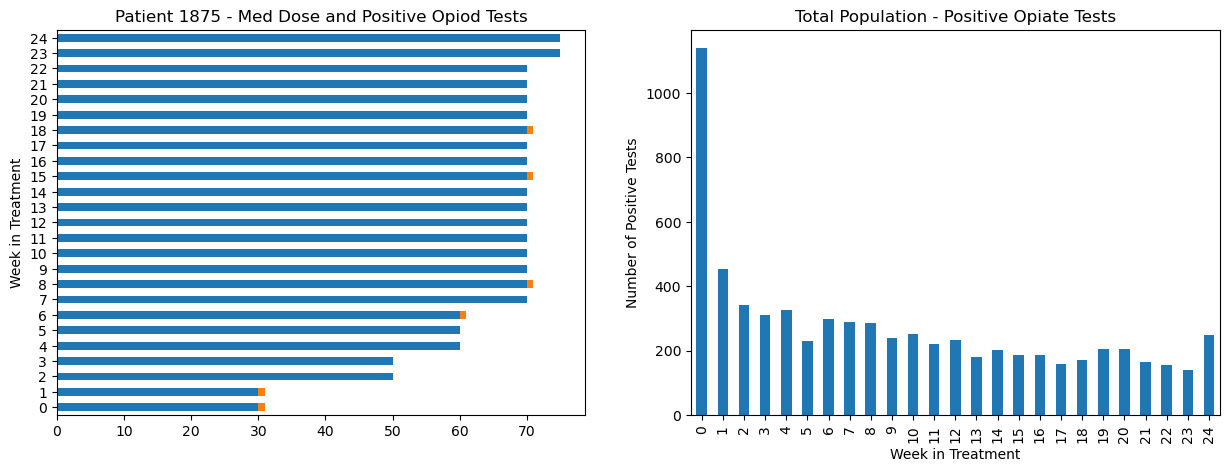

In [43]:
# create 2 plots next to eachother

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

f.loc[f.patdeid==1875].groupby('VISIT').agg({'total_dose':'sum',
                                            't_Opiate300':'sum'}).plot(
                                            kind='barh', stacked=True,
                                            title='Patient 1875 - Med Dose and Positive Opiod Tests',
                                            ylabel='Week in Treatment',
                                            legend=False,ax=ax1);
                                            
f.groupby('VISIT').agg({'t_Opiate300':'sum'}).plot(kind='bar', 
                                                   figsize=(15,5), 
                                                   legend=False,
                                                   title='Total Population - Positive Opiate Tests', 
                                                   xlabel='Week in Treatment', 
                                                   ylabel='Number of Positive Tests',
                                                   ax=ax2);
